In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"1.1-Output/ProcessedFeatures.csv")

In [3]:
df.drop(columns=['ICMP Code', 'ICMP Type', 'Src Port', 'Dst Port', 'Protocol', 'Fwd URG Flags', 'Bwd URG Flags', 'URG Flag Count'], inplace=True)

In [4]:
# Step 3: Check for Missing or Infinite Values
print("Any NaNs? ", df.isna().sum().sum())
print("Any infs? ", np.isinf(df.values).sum())

Any NaNs?  0
Any infs?  0


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Check shape and a few rows
print("Scaled shape:", X_scaled.shape)
pd.DataFrame(X_scaled, columns=df.columns).head()

Scaled shape: (2099971, 76)


,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Total TCP Flow Time
0,3.457206,0.251017,-0.012270,-0.054524,-0.008343,-0.427369,-0.606049,-0.542756,-0.391062,-0.547484,...,-1.704588,10.961130,18.418502,18.275408,-0.131877,0.593958,1.880174,1.104872,0.172649,-0.082193
1,1.710282,-0.007492,-0.007088,-0.026996,-0.008233,-0.329765,0.764480,-0.019357,-0.391062,-0.526153,...,-0.904556,1.759372,-0.126612,1.048778,2.018078,4.287819,-0.109085,4.092575,4.389093,-0.082193
2,3.272155,0.292378,-0.012270,1.899921,-0.008343,-0.116256,0.450400,0.292289,-0.106479,-0.547484,...,-0.904556,3.340526,11.497597,8.822260,-0.131881,1.516189,6.964019,3.024593,0.096655,-0.082193
3,1.759459,-0.005194,-0.005361,-0.017819,-0.008196,-0.329765,0.764480,-0.019357,-0.391062,-0.526153,...,-0.904556,13.911593,-0.126612,8.863924,15.619113,3.708500,-0.109085,3.537359,3.798947,-0.082193
4,1.791939,-0.005194,-0.005361,-0.017819,-0.008196,-0.329765,0.764480,-0.019357,-0.391062,-0.526153,...,-0.904556,13.922962,-0.126612,8.871236,15.631839,3.779585,-0.109085,3.605486,3.871360,-0.082193


In [6]:
from sklearn.decomposition import PCA

# Step 5: Apply PCA (retain all components for now)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

print("Original shape:", X_scaled.shape)
print("PCA shape:", X_pca.shape)

Original shape: (2099971, 76)
PCA shape: (2099971, 76)


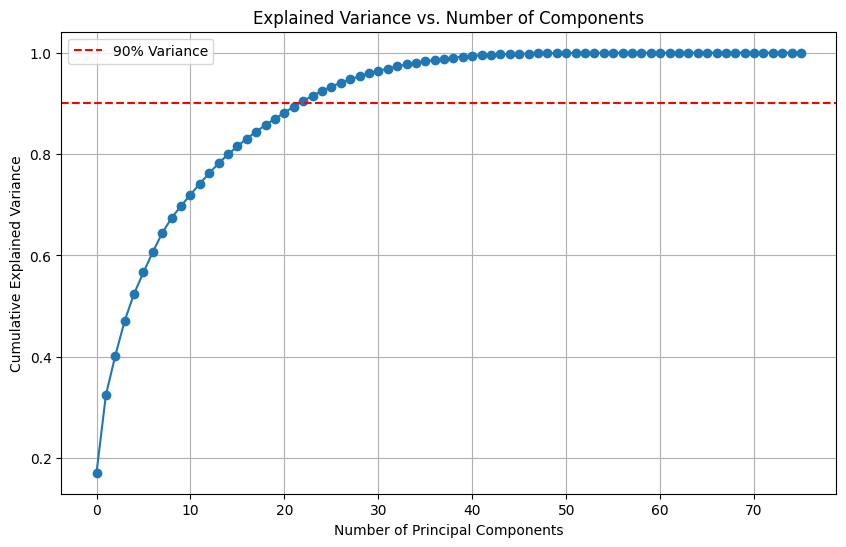

In [7]:
# Step 6: Explained Variance Plot
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs. Number of Components")
plt.grid(True)
plt.axhline(y=0.90, color='r', linestyle='--', label="90% Variance")
plt.legend()
plt.show()

In [8]:
# Step 7: Choose Number of Components to Retain (e.g., 90% variance)
# You can adjust this value based on the elbow curve above
n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.90) + 1
print(f"Number of components to retain 90% variance: {n_components}")

Number of components to retain 90% variance: 23


In [9]:
# Step 8: Re-fit PCA with reduced number of components
pca_reduced = PCA(n_components=n_components)
X_reduced = pca_reduced.fit_transform(X_scaled)

print("Reduced PCA shape:", X_reduced.shape)

Reduced PCA shape: (2099971, 23)
